# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import load_img, img_to_array

# Load CIFAR10 dataset

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.cifar10.load_data()

# Preprocessing

In [3]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

In [4]:
categories = ['airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create model

In [6]:
# create CNN - convolutional neural network

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    
    layers.MaxPooling2D((2, 2)),
                  
    layers.Flatten(),
        
    layers.Dense(128, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

In [7]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training

In [8]:
history = cnn.fit(train_imgs, train_labels, epochs=8, validation_data=(test_imgs, test_labels))

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3855 - loss: 1.6855 - val_accuracy: 0.5742 - val_loss: 1.1981
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5958 - loss: 1.1523 - val_accuracy: 0.6289 - val_loss: 1.0629
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6458 - loss: 1.0067 - val_accuracy: 0.6473 - val_loss: 1.0096
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6812 - loss: 0.9091 - val_accuracy: 0.6461 - val_loss: 1.0323
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7096 - loss: 0.8294 - val_accuracy: 0.6748 - val_loss: 0.9415
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7317 - loss: 0.7678 - val_accuracy: 0.6766 - val_loss: 0.9489
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7519 - loss: 0.7040 - val_accuracy: 0.6729 - val_loss: 0.9632
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7751 - loss: 0.6404 - val_

In [9]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Test Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.7666800022125244
Test Accuracy: 0.6909999847412109


# Model summary

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 30, 30, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 15, 15, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 13, 13, 32)            │       9,248 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 6, 6, 32)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 1152)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 128)                   │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 477,056 (1.82 MB)

 Trainable params: 159,018 (621.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,038 (1.21 MB)

# Plot training values

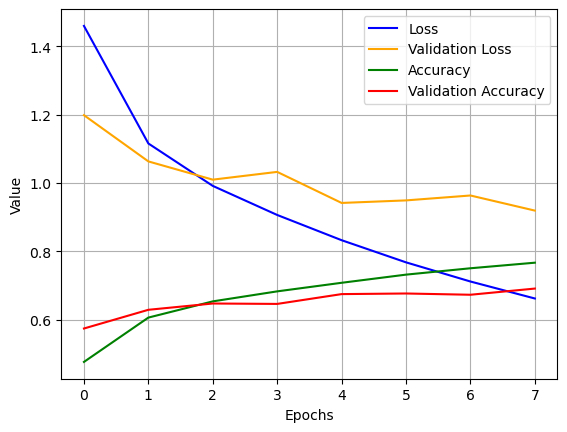

In [11]:
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Test with random images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


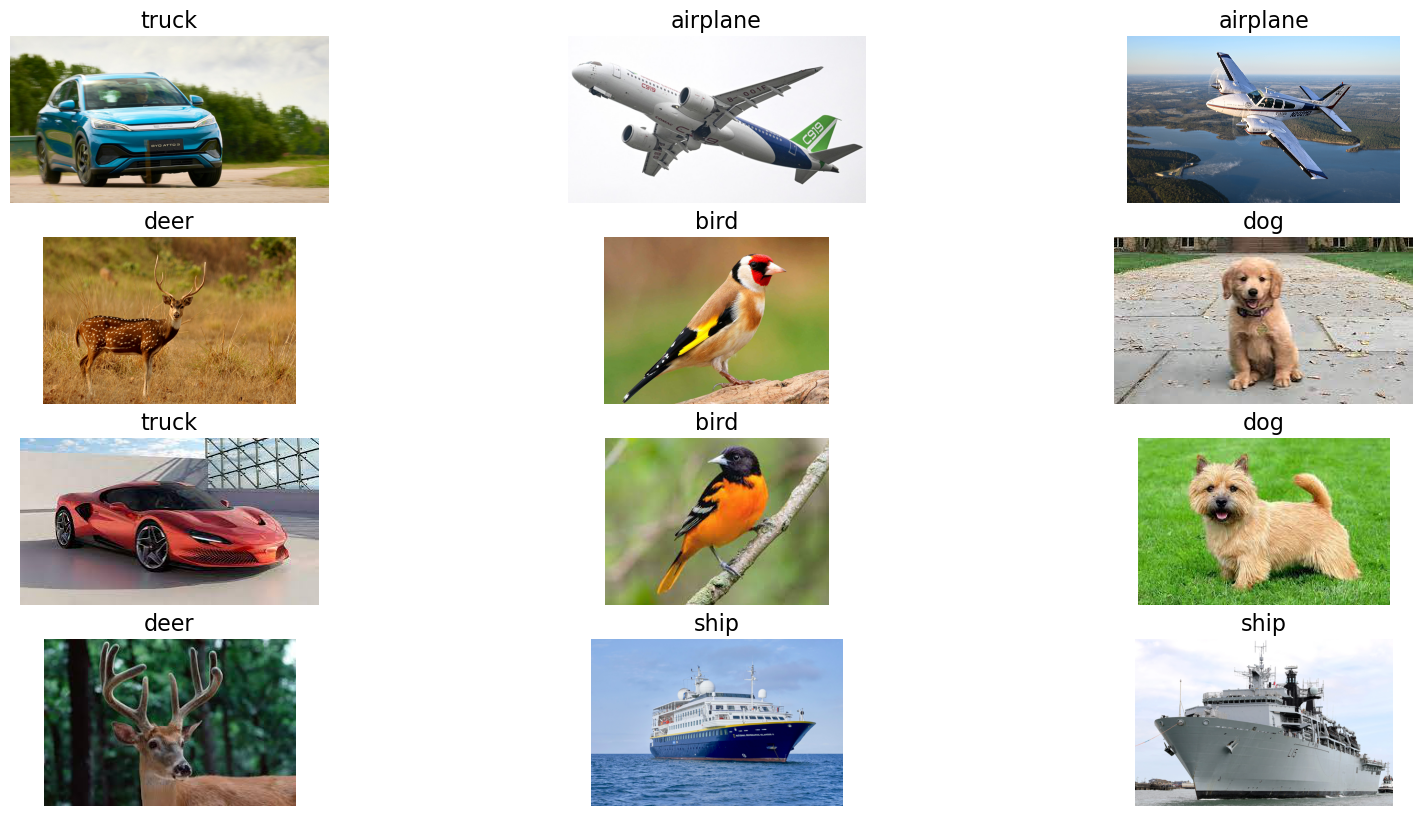

In [12]:
test_folder = 'test3' 

num_images_to_display = len(os.listdir(test_folder))
plt.figure(figsize=(20, 10))

for idx, filename in enumerate(os.listdir(test_folder), start=1):
    file_path = os.path.join(test_folder, filename)
    plt.subplot(4, 3, idx)

    orig_img = load_img(file_path)
    img = load_img(file_path, target_size=(32, 32))  # Target size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = img_array / 255.0  # Normalization

    prediction = cnn.predict(processed_img)
    predicted_class = np.argmax(prediction)

    plt.imshow(orig_img)
    plt.axis('off')
    predicted_label = categories[predicted_class]

    text_y = orig_img.size[1] + 100
    plt.title(f"{predicted_label}", fontsize=16)

plt.show()